# **RNN Introduction**


## Importing required libraries


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [17]:
df = pd.read_csv('traffic.csv')
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [18]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [19]:
df.drop('ID', axis=1, inplace=True)

## Visualization

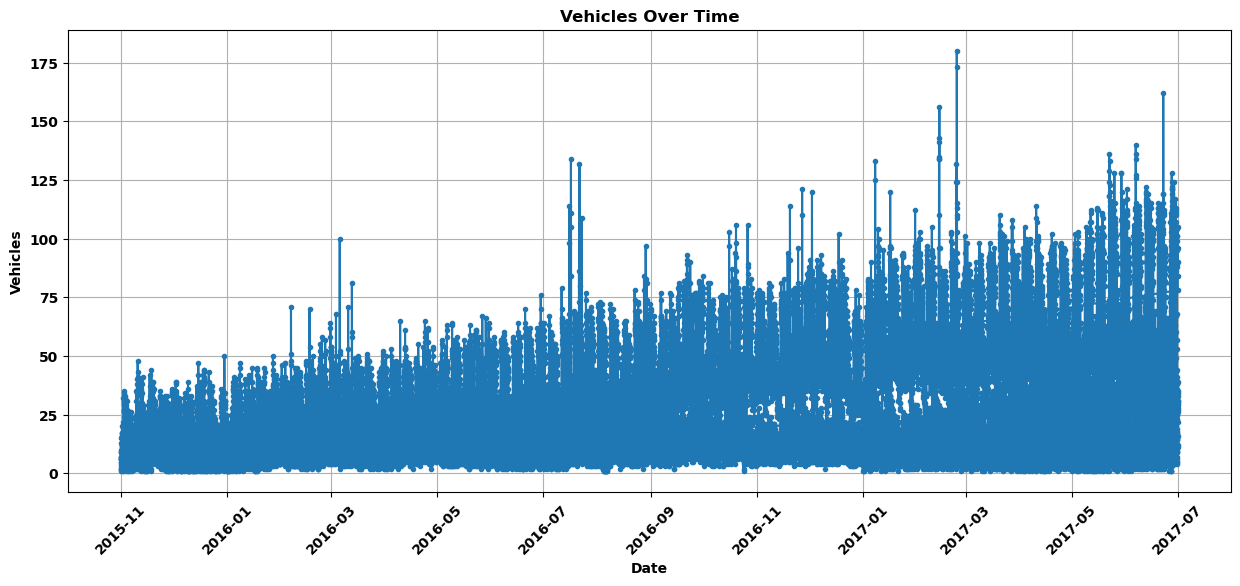

In [20]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
# Normalize the data
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df['Vehicles'].values.reshape(-1,1))

In [22]:
# Create sequences for input data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

In [23]:
sequence_length = 10
X = create_sequences(df['Vehicles'], sequence_length)
y = df['Vehicles'][sequence_length:].values

## Split the data into train and test

In [24]:
# # Split into training and testing sets
# train_size = int(len(df) * 0.8)  # 80% for training
# train_data, test_data = df[:train_size], df[train_size:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling


In [39]:
# Initialize a sequential model
model = Sequential()

# First RNN layer with 50 units, input shape, and return sequences
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second RNN layer with 50 units and return sequences
model.add(SimpleRNN(units=50, return_sequences=True))
#model.add(Dropout(0.2))

# Third RNN layer with 50 units
model.add(SimpleRNN(units=50))
#model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1),)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
# Train the model
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),callbacks= [early_stopping])

Epoch 1/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0014 - val_loss: 8.2913e-04
Epoch 2/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.8646e-04 - val_loss: 6.2362e-04
Epoch 3/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.4789e-04 - val_loss: 6.5825e-04
Epoch 4/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2664e-04 - val_loss: 6.3169e-04
Epoch 5/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.2019e-04 - val_loss: 6.0190e-04
Epoch 6/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.0274e-04 - val_loss: 6.0810e-04
Epoch 7/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.1242e-04 - val_loss: 6.0833e-04
Epoch 8/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.1986e-04 - val_loss: 5.9156e-04
Epoch 9/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.8344e-04 - val_loss: 6.0216e-04
Epoch 10/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.0053e-04 - val_loss: 6.2085e-04
Epoch 11/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 

In [42]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# # Transform back to original form
# train_predict=scaler.inverse_transform(train_predict)
# test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# # Calculate train data RMSE
# print(math.sqrt(mean_squared_error(y_train,train_predict)))
# # Calculate test data RMSE
# print(math.sqrt(mean_squared_error(y_test,test_predict)))

## Visualization of results


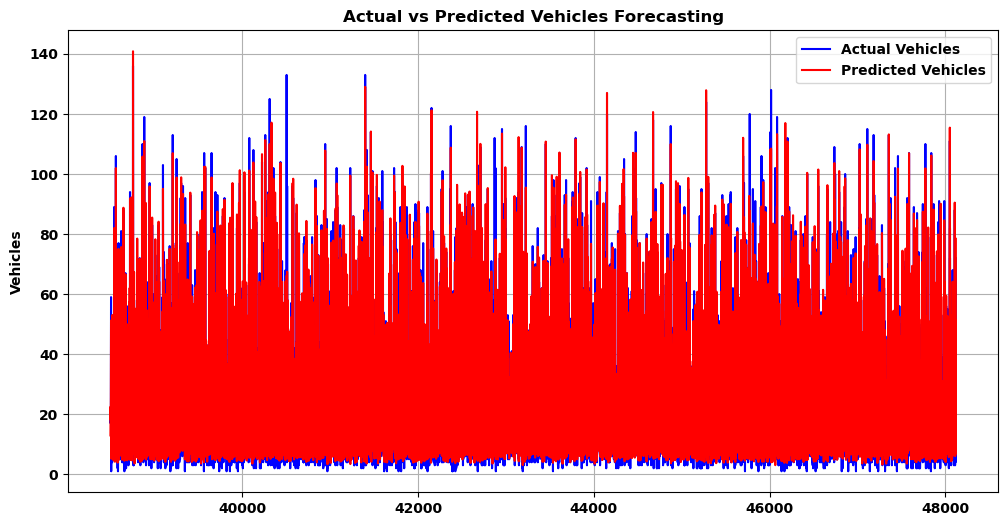

In [43]:
plt.figure(figsize=(12, 6))

# Denormalize the data
y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_denormalized = scaler.inverse_transform(test_predict)

plt.plot(df.index[-len(y_test_denormalized):], y_test_denormalized, label='Actual Vehicles', color='b')
plt.plot(df.index[-len(predictions_denormalized):], predictions_denormalized, label='Predicted Vehicles', color='r')

plt.xlabel('')
plt.ylabel('Vehicles')
plt.title('Actual vs Predicted Vehicles Forecasting')
plt.legend()
plt.grid(True)
plt.show()